# Data Visualization - Construction permits, part 1/2


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1">Overview</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-2">Explore the data</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2.1">Data Exploration</a></span></li></ul></li><li><span><a href="#Permits-by-Status" data-toc-modified-id="Permits-by-Status-3">Permits by Status</a></span></li><li><span><a href="#Permits-by-Type" data-toc-modified-id="Permits-by-Type-4">Permits by Type</a></span><ul class="toc-item"><li><span><a href="#Clean-up-the-data" data-toc-modified-id="Clean-up-the-data-4.1">Clean up the data</a></span></li><li><span><a href="#Filter-the-permits" data-toc-modified-id="Filter-the-permits-4.2">Filter the permits</a></span></li><li><span><a href="#Visualize-filtered-dataset" data-toc-modified-id="Visualize-filtered-dataset-4.3">Visualize filtered dataset</a></span></li></ul></li><li><span><a href="#Visualize-temporal-and-spatial-trends" data-toc-modified-id="Visualize-temporal-and-spatial-trends-5">Visualize temporal and spatial trends</a></span><ul class="toc-item"><li><span><a href="#Visualize-permits-by-time-of-issue" data-toc-modified-id="Visualize-permits-by-time-of-issue-5.1">Visualize permits by time of issue</a></span></li></ul></li></ul></div>


## Overview


One indicator of a region's growth is the number of permits issued for new construction. Exploring and analyzing permit activity can help regional planners ensure that development occurs in accordance to the area's long-term goals. One area that has recently experienced rapid growth is Montgomery County, Maryland, a suburban county near Washington, D.C. County planners want to observe spatial and temporal growth trends, find out why certain areas are growing faster than others, and communicate key information about the county's growth to the public.

In this notebook, you'll explore Montgomery County permit data. First, you'll add the permit data from ArcGIS Living Atlas of the World. You'll explore the data and become familiar with exactly what kind of information it contains. Then, you'll analyze the data to detect patterns and find out why growth is occurring. Once you've gathered your findings from your exploration and analysis, you'll share your work online.


## Explore the data

To better understand trends in permit activity in Montgomery County, you'll add a dataset of permits issued since 2010. Before you begin your analysis, however, it's important to explore your data and understand what it shows and does not show. You'll familiarize yourself with the data's attributes, sort the data by type, and visualize spatial and temporal trends. In doing so, you'll gain context for your analysis and know exactly which questions you still need to ask to find out why, where, and when growth is occurring.


Connect to your ArcGIS online organization.


In [1]:
import pandas as pd

from arcgis.map.renderers import UniqueValueRenderer
from arcgis.gis import GIS

In [2]:
agol_gis = GIS()

Search for the **Commercial Permits since 2010** layer. You can specify the owner"s name to get more specific results. To search for content from the Living Atlas, or content shared by other users on ArcGIS Online, set `outside_org=True`.


In [3]:
data = agol_gis.content.search("title: Commercial Permits since 2010", "Feature layer",
                               outside_org=True)
data[0]

<Item title:"Commercial Permits since 2010" type:Feature Layer Collection owner:Learn_ArcGIS>

Get the first item from the results.


In [4]:
permits = data[0]

Since the item is a Feature Layer Collection, accessing the layers property gives us a list of FeatureLayer objects. The permit layer is the first layer in this item. Visualize this layer on a map of Montgomery County, Maryland.


In [5]:
permit_layer = permits.layers[0]


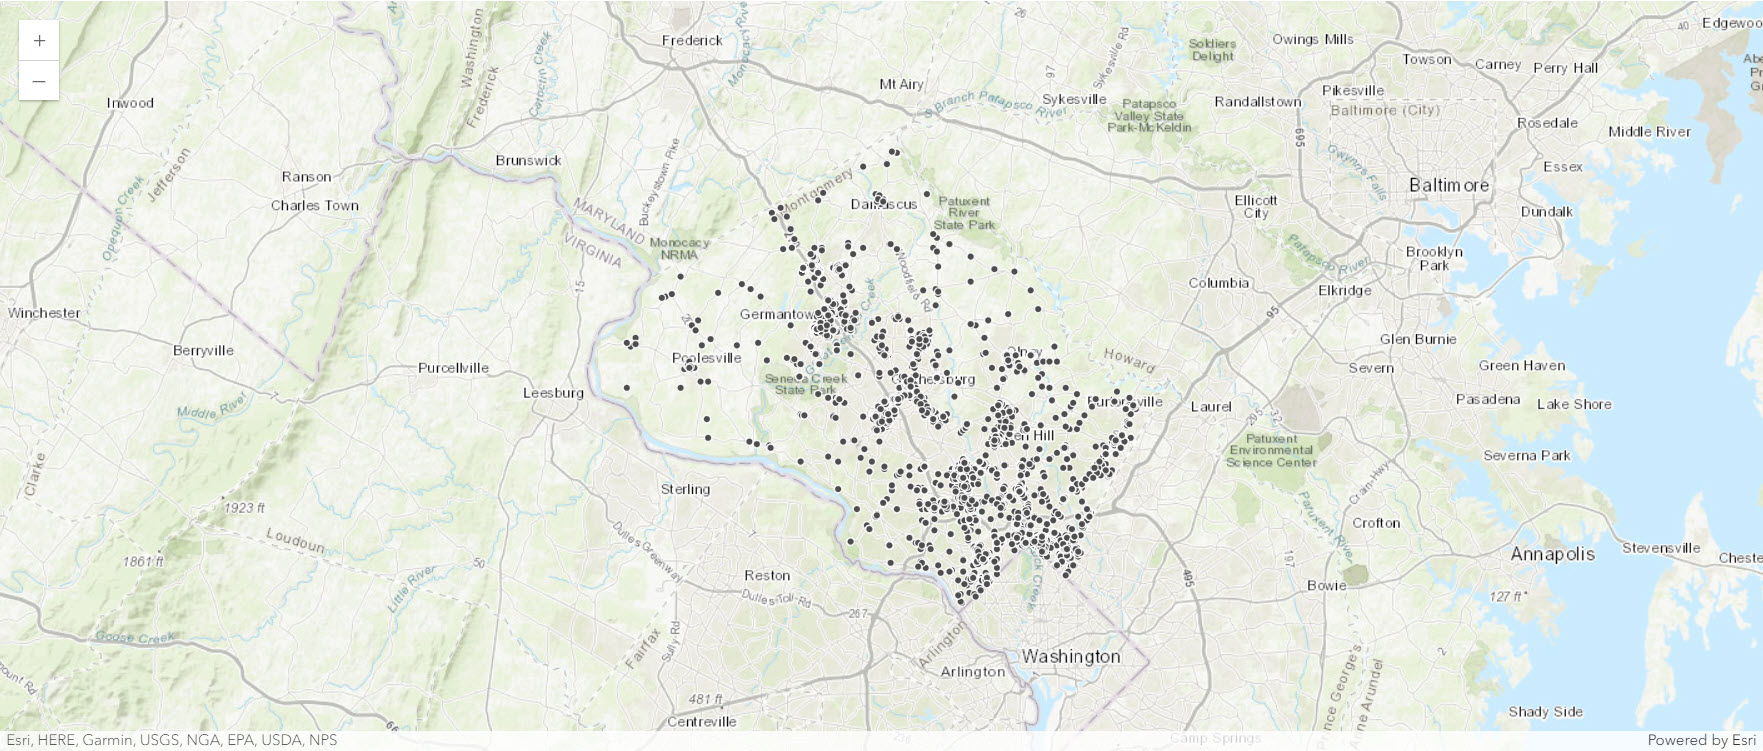

In [6]:
permit_map = agol_gis.map("Montgomery County, Maryland")
permit_map

You can add a number of different layer objects such as FeatureLayer, FeatureCollection, ImageryLayer, MapImageLayer to the map by calling the `content.add()` method.


In [7]:
permit_map.content.add(permit_layer)

### Data Exploration


Now that you've added the permit data, you'll explore its contents. Geographic data doesn"t only contain information about location; it can also include other attributes not seen on a map.

Convert the layer into a spatially-enabled dataframe to explore these attributes.


In [8]:
permit_layer

<FeatureLayer url:"https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/Commercial_Permits_since_2010/FeatureServer/0">

In [9]:
sdf = pd.DataFrame.spatial.from_layer(permit_layer)

`tail()` method gives the last 5 rows of the dataframe.


In [10]:
sdf.tail()

,FID,Permit_Num,Status,Street_Num,Pre_direct,Street_Nam,Street_Suf,Post_direc,Address,City,...,Declared_V,Descriptio,Applicatio,Work_Type,Use_Code,Location,BldgAreaNu,DeclValNu,DeclValNu2,SHAPE
11219,11220,661927,Stop Work,1015,,SPRING,ST,,1015 SPRING ST,SILVER SPRING,...,"$42,000.00",Silver Spring Enterprise Zone Add exterior ca...,COMMERCIAL BUILDING,ADD,BUSINESS BUILDING,"1015 SPRING ST SILVER SPRING, MD 20910 (38.999...",707.91,42000.0,42000.0,"{""x"": -8574668.7047, ""y"": 4721607.997599997, ""..."
11220,11221,663136,Stop Work,26100,,WOODFIELD,RD,,26100 WOODFIELD RD,DAMASCUS,...,"$5,875.00",PYLON SIGN,COMMERCIAL BUILDING,CONSTRUCT,BUSINESS BUILDING,"26100 WOODFIELD RD DAMASCUS, MD 20872 (39.2851...",0.0,5875.0,5875.0,"{""x"": -8594080.2264, ""y"": 4762636.6635000035, ..."
11221,11222,663860,Stop Work,10520,,MONTROSE,AVE,,10520 MONTROSE AVE,BETHESDA,...,"$31,000.00",Remodeling a one story building with walk-out ...,COMMERCIAL BUILDING,ADD,ASSEMBLY BUILDING,"10520 MONTROSE AVE BETHESDA, MD 20814 (39.0285...",728.0,31000.0,31000.0,"{""x"": -8582314.4798, ""y"": 4725770.635600001, ""..."
11222,11223,665053,Stop Work,8500,,RIVER,RD,,8500 RIVER RD,BETHESDA,...,"$1,000.00",TOTAL OF 17 GROUPED TENTS FOR 2014 QUICKEN LOA...,COMMERCIAL BUILDING,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD BETHESDA, MD 20817 (38.999234, -...",472.02,1000.0,1000.0,"{""x"": -8591206.0439, ""y"": 4721680.315399997, ""..."
11223,11224,665407,Stop Work,8500,,RIVER,RD,,8500 RIVER RD,BETHESDA,...,$1.00,1 GRANDSTAND & MULTIPLE PLATFORMS FOR 2014 QUI...,COMMERCIAL BUILDING,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD BETHESDA, MD 20817 (38.999234, -...",8461.55,1.0,1.0,"{""x"": -8591206.0439, ""y"": 4721680.315399997, ""..."


The permit data contains a long list of attributes. Some attributes have self-explanatory names, while others may have names that can be difficult to understand without context. The list of attributes can be obtained using the columns of the dataframe.


In [11]:
sdf.rename(columns=lambda x: x.lower() if x != "SHAPE" else x, inplace=True)
sdf.columns

Index(['fid', 'permit_num', 'status', 'street_num', 'pre_direct', 'street_nam',
       'street_suf', 'post_direc', 'address', 'city', 'state', 'zip_code',
       'added_date', 'issue_date', 'final_date', 'building_a', 'declared_v',
       'descriptio', 'applicatio', 'work_type', 'use_code', 'location',
       'bldgareanu', 'declvalnu', 'declvalnu2', 'SHAPE'],
      dtype='object')

In [12]:
sdf.describe().T

,count,mean,min,25%,50%,75%,max,std
fid,11224.0,5612.5,1.0,2806.75,5612.5,8418.25,11224.0,3240.234045
permit_num,11224.0,655806.112794,528631.0,587437.5,652073.5,722003.25,796193.0,77592.848742
zip_code,11224.0,20848.988863,0.0,20832.0,20871.0,20901.0,21771.0,558.188206
added_date,11224,2013-10-05 05:09:03.977191424,2010-01-04 00:00:00,2011-12-21 00:00:00,2013-10-18 00:00:00,2015-07-28 00:00:00,2017-04-17 00:00:00,NaN
issue_date,10462,2013-11-13 08:28:01.972854272,2010-01-15 00:00:00,2012-03-22 00:00:00,2013-11-06 00:00:00,2015-08-19 00:00:00,2017-04-17 00:00:00,NaN
final_date,5396,2014-01-15 06:02:08.094884864,2010-02-26 00:00:00,2012-07-17 00:00:00,2014-03-21 00:00:00,2015-08-03 00:00:00,2017-04-17 00:00:00,NaN
bldgareanu,11224.0,9241.778777,0.0,255.0,1537.0,4000.0,1548205.0,39504.843888
declvalnu,11224.0,784736.03562,0.0,20000.0,74000.0,200000.0,1129634100.0,11522285.090434
declvalnu2,11224.0,784736.03562,0.0,20000.0,74000.0,200000.0,1129634100.0,11522285.090434


Query the types of attributes and explore the data.


In [13]:
sdf.dtypes

fid                    Int64
permit_num             Int32
status        string[python]
street_num    string[python]
pre_direct    string[python]
street_nam    string[python]
street_suf    string[python]
post_direc    string[python]
address       string[python]
city          string[python]
state         string[python]
zip_code               Int32
added_date    datetime64[ns]
issue_date    datetime64[ns]
final_date    datetime64[ns]
building_a    string[python]
declared_v    string[python]
descriptio    string[python]
applicatio    string[python]
work_type     string[python]
use_code      string[python]
location      string[python]
bldgareanu           Float64
declvalnu            Float64
declvalnu2           Float64
SHAPE               geometry
dtype: object

In [14]:
sdf["work_type"].unique()

<StringArray>
[                 'CONSTRUCT',                      'ALTER',
   'COMMERCIAL CHANGE OF USE',    'RESTORE AND / OR REPAIR',
                        'ADD',           'BUILD FOUNDATION',
                    'INSTALL',                    'REPLACE',
 'CONSTRUCT SHEETING/SHORING',              'FINAL ONLY AP',
         'REMOVE AND REPLACE',                     'OCCUPY',
                   'DEMOLISH']
Length: 13, dtype: string

In [15]:
sdf["status"].unique()

<StringArray>
['Finaled', 'Issued', 'Open', 'Stop Work']
Length: 4, dtype: string

In [16]:
sdf["use_code"].unique()

<StringArray>
[         'MULTI-FAMILY DWELLING',                     'RESTAURANT',
              'BUSINESS BUILDING',            'MERCANTILE BUILDING',
               'PLACE OF WORSHIP',              'ASSEMBLY BUILDING',
               'STORAGE BUILDING',                         'GARAGE',
         'INSTITUTIONAL BUILDING', 'COMMERCIAL MISCELLANEOUS STRUC',
            'INDUSTRIAL BUILDING',           'EDUCATIONAL BUILDING',
                          'TOWER',                  'SWIMMING POOL',
                          'FENCE',                           'BANK',
                           'SHED', 'MULTI-FAMILY SENIOR CITIZEN BL',
                 'RETAINING WALL',                        'TRAILER',
                       'HOSPITAL',                     'BIOSCIENCE',
                      'TOWNHOUSE',                          'HOTEL',
                        'FACTORY',                 'BOARDING HOUSE',
          'SWIMMING POOL & FENCE',         'UTILITY, MISCELLANEOUS',
                    

## Permits by Status


The `groupby()` method groups the rows per the column and does calculations, such as finding their counts, as shown in the following code.


In [17]:
permits_by_status = sdf.groupby(sdf["status"]).size()
permits_by_status

status
Finaled      5341
Issued       4696
Open          757
Stop Work     430
dtype: int64

There are only four permit statuses: Issued, Finaled, Open, and Stop Work. To visualize the number of permits for each status, you'll create a pie chart.


Since the dataframe attributes just show the count of status, you can consider any attribute to graph the status count.


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: ylabel='Permits by Status'>

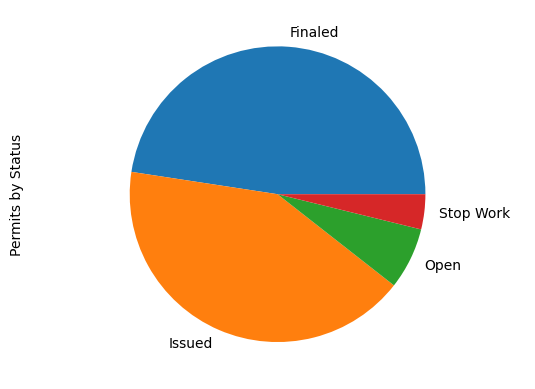

In [19]:
plt.axis("equal")
permits_by_status.plot(kind="pie", legend=False, label="Permits by Status")

The pie chart above shows the four permit statuses, with the size of each status determined by the number of permits. The vast majority of permits are either Issued or Finaled. Finaled permits are issued permits that have also had the requisite inspections performed.


It's helpful to visualize the spatial distribution of permit attributes on a map. You'll change the map so that each permit's symbol represents its status.



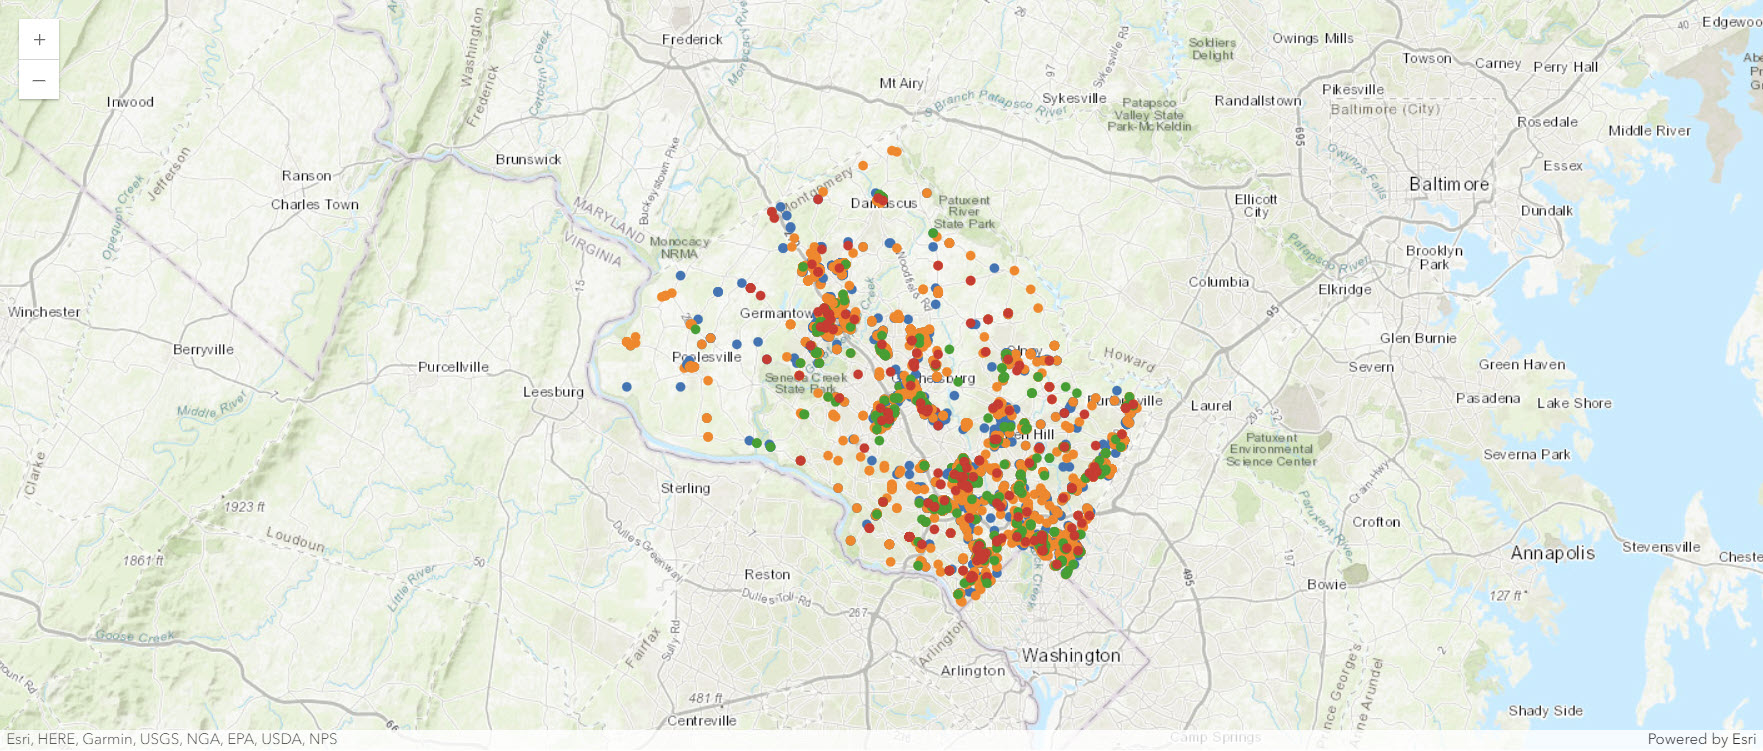

In [20]:
permits_by_status_map = agol_gis.map("Montgomery County, Maryland")
permits_by_status_map

In [21]:
status_value_infos = [
    {
        "value": "Stop Work",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [205, 51, 46, 255],
            "size": 6,
        },
    },
    {
        "value": "Issued",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [246, 132, 34, 255],
            "size": 6,
        },
    },
    {
        "value": "Open",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [60, 159, 48, 255],
            "size": 6,
        },
    },
    {
        "value": "Finaled",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [54, 117, 179, 255],
            "size": 6,
        },
    }
]

In [22]:
sdf.spatial.plot(
    map_widget=permits_by_status_map,
    renderer=UniqueValueRenderer(
        field1="status",
        unique_value_infos=status_value_infos
    )
)

True

## Permits by Type


In [23]:
permits_by_type = sdf.groupby(["use_code"]).size()
permits_by_type

use_code
ASSEMBLY BUILDING                  394
BANK                                87
BIOSCIENCE                          39
BOARDING HOUSE                       3
BUSINESS BUILDING                 3461
COMMERCIAL MISCELLANEOUS STRUC    1197
EDUCATIONAL BUILDING               658
FACTORY                              4
FENCE                               10
GARAGE                              56
HOSPITAL                           143
HOTEL                               44
INDUSTRIAL BUILDING                 53
INSTITUTIONAL BUILDING              30
MERCANTILE BUILDING               1016
MISCELLANEOUS STRUCTURE              9
MULTI-FAMILY DWELLING             1838
MULTI-FAMILY SENIOR CITIZEN BL      71
MULTIFAMILY DWELLING HIGH RISE      10
MULTIFAMILY DWELLING LOW RISE       31
OWNERSHIP UNIT                       1
PLACE OF WORSHIP                   167
RESTAURANT                         638
RETAINING WALL                     185
SHED                                28
STORAGE BUILDING

The series is not sorted properly. Use the `sort()` method to sort it from highest count to lowest count. The most common use code, **Business Buildings**, has almost twice as many permits as the second highest, **Multi-family Dwelling**. The top four use codes together comprise the majority of all permits, so these use codes may be the most important to focus on in your analysis later.


In [24]:
permits_by_type.sort_values(ascending=False, inplace=True)
permits_by_type.head()

use_code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
TOWNHOUSE                          680
dtype: int64

### Clean up the data


Before you begin analysis of your data, you'll hide attribute fields you don't intend to use, rename fields with unclear names, and filter your dataset to only show permits with the four most common use codes. These changes won't permanently affect the original dataset, but they will make the data easier to work with and understand.


**'Declared_V'**, **'Building_A'**, **'Applicatio'** attribute fields describe aspects of the data that aren't important for your analysis. You'll drop these fields.


In [25]:
sdf.drop(["declared_v", "building_a", "applicatio"], axis=1, inplace=True)

In [26]:
sdf.columns

Index(['fid', 'permit_num', 'status', 'street_num', 'pre_direct', 'street_nam',
       'street_suf', 'post_direc', 'address', 'city', 'state', 'zip_code',
       'added_date', 'issue_date', 'final_date', 'descriptio', 'work_type',
       'use_code', 'location', 'bldgareanu', 'declvalnu', 'declvalnu2',
       'SHAPE'],
      dtype='object')

The fields are no longer listed.


Next, you'll rename some of the attribute fields with shortened or unclear names so that their names are more descriptive.


In [27]:
sdf.rename(columns={"descriptio": "Description", "bldgareanu": "Building_Area",
           "declvalnu": "Declared_Value"}, inplace=True)

In [28]:
sdf.columns

Index(['fid', 'permit_num', 'status', 'street_num', 'pre_direct', 'street_nam',
       'street_suf', 'post_direc', 'address', 'city', 'state', 'zip_code',
       'added_date', 'issue_date', 'final_date', 'Description', 'work_type',
       'use_code', 'location', 'Building_Area', 'Declared_Value', 'declvalnu2',
       'SHAPE'],
      dtype='object')

There are other fields that you may want to either rename or remove, but for the purposes of this lesson, these are enough.


### Filter the permits

Next, you'll filter the permits to reduce the number of records in your analysis. As you saw previously, there are four types of permits that comprise over half the total number of permits. Focusing your analysis on just these four types will reduce the amount of data to analyze without ignoring the most important types of development. To remove the other use codes, you'll create a filter.


In [29]:
permits_by_type.head(4)  # top 4 Use_Codes

use_code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
dtype: int64

In [30]:
filtered_permits = list(permits_by_type.head(4).index)
filtered_permits

['BUSINESS BUILDING',
 'MULTI-FAMILY DWELLING',
 'COMMERCIAL MISCELLANEOUS STRUC',
 'MERCANTILE BUILDING']

To visualize the top 4 Use Codes on a map, you can filer the dataframe with Use_Code containing only the top 4 attribute value.


In [31]:
filtered_df = sdf.loc[sdf["use_code"].isin(filtered_permits)]

In [32]:
filtered_df.head()

,fid,permit_num,status,street_num,pre_direct,street_nam,street_suf,post_direc,address,city,...,issue_date,final_date,Description,work_type,use_code,location,Building_Area,Declared_Value,declvalnu2,SHAPE
0,1,528907,Finaled,13536,,WATERFORD HILLS,BLVD,,13536 WATERFORD HILLS BLVD,GERMANTOWN,...,2011-07-08,2012-03-13,MODEL: TULIP - Unit #D036 - BLDG #4,CONSTRUCT,MULTI-FAMILY DWELLING,"13536 WATERFORD HILLS BLVD GERMANTOWN, MD 2087...",1336.0,103000.0,103000.0,"{""x"": -8602565.104, ""y"": 4747203.126800001, ""s..."
1,2,528908,Finaled,13538,,WATERFORD HILLS,BLVD,,13538 WATERFORD HILLS BLVD,GERMANTOWN,...,2011-07-08,2012-03-15,MODEL: ORCHID - Unit #D038 - BLDG #4,CONSTRUCT,MULTI-FAMILY DWELLING,"13538 WATERFORD HILLS BLVD GERMANTOWN, MD 2087...",1730.0,117000.0,117000.0,"{""x"": -8602567.5243, ""y"": 4747204.106700003, ""..."
2,3,528909,Finaled,13540,,WATERFORD HILLS,BLVD,,13540 WATERFORD HILLS BLVD,GERMANTOWN,...,2011-07-08,2012-03-15,MODEL: TULIP - Unit #D040 - BLDG #4,CONSTRUCT,MULTI-FAMILY DWELLING,"13540 WATERFORD HILLS BLVD GERMANTOWN, MD 2087...",1336.0,103000.0,103000.0,"{""x"": -8602569.9445, ""y"": 4747205.0867, ""spati..."
3,4,528910,Finaled,13542,,WATERFORD HILLS,BLVD,,13542 WATERFORD HILLS BLVD,GERMANTOWN,...,2011-07-08,2012-03-15,MODEL: ORCHID - Unit #D042 - BLDG #4,CONSTRUCT,MULTI-FAMILY DWELLING,"13542 WATERFORD HILLS BLVD GERMANTOWN, MD 2087...",1730.0,117000.0,117000.0,"{""x"": -8602572.3648, ""y"": 4747206.066600002, ""..."
4,5,528911,Finaled,13544,,WATERFORD HILLS,BLVD,,13544 WATERFORD HILLS BLVD,GERMANTOWN,...,2011-07-08,2012-03-15,MODEL: TULIP - Unit #D044 - BLDG #4,CONSTRUCT,MULTI-FAMILY DWELLING,"13544 WATERFORD HILLS BLVD GERMANTOWN, MD 2087...",1336.0,103000.0,103000.0,"{""x"": -8602574.7851, ""y"": 4747207.046599999, ""..."


In [33]:
sdf.shape, filtered_df.shape

((11224, 23), (7512, 23))

The dataset is filtered. Instead of more than 11,000 permits, the filtered dataframe has about 7,500.


### Visualize filtered dataset



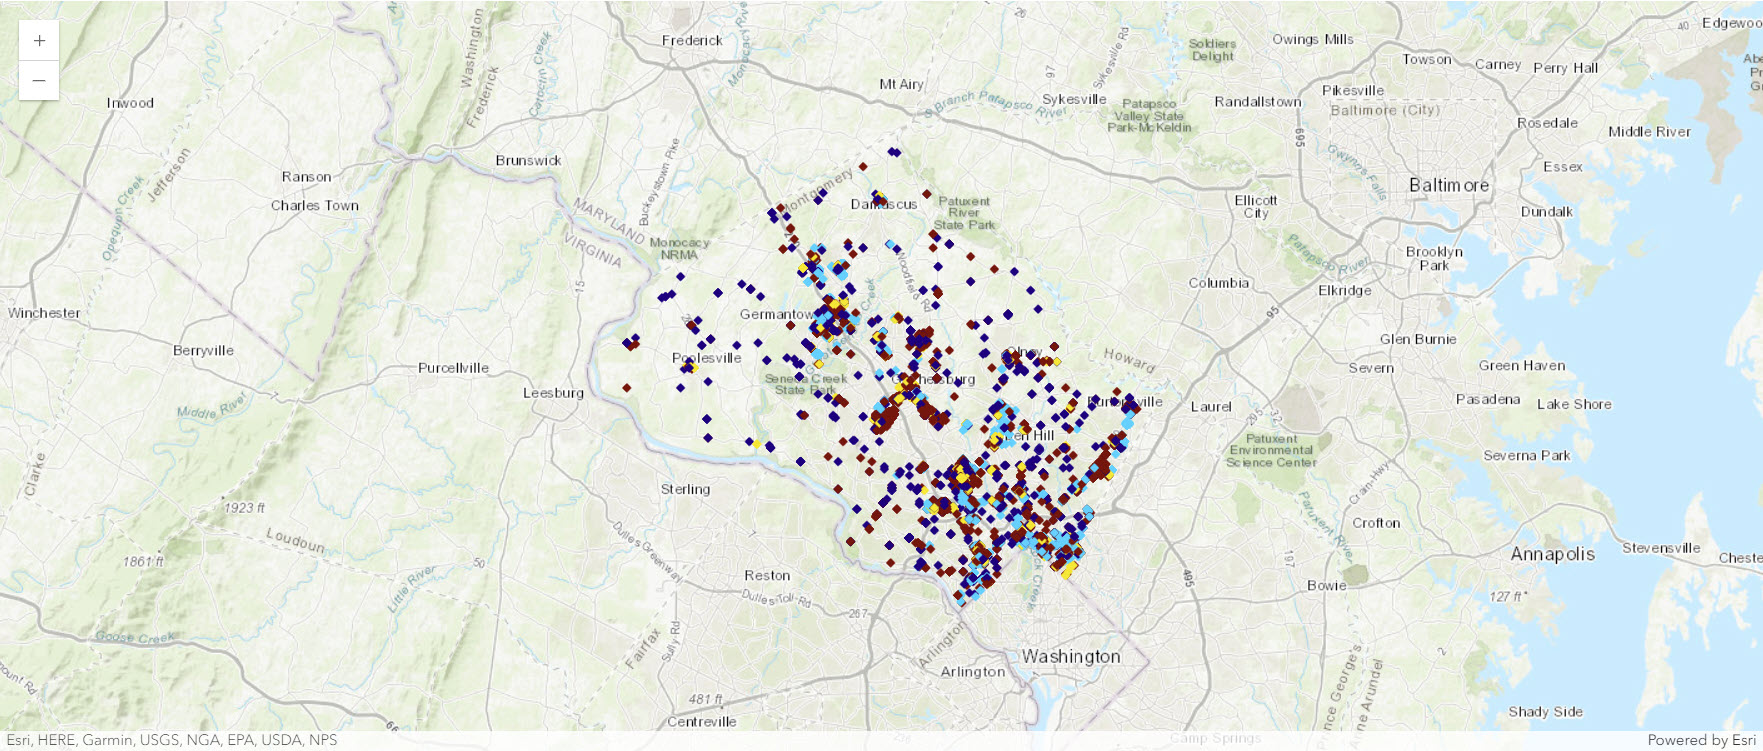

In [34]:
filtered_map = agol_gis.map("Montgomery County, Maryland")
filtered_map

In [35]:
use_code_value_infos = [
    {
        "value": "MULTI-FAMILY DWELLING",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [75, 210, 254, 255],
            "size": 6,
        },
    },
    {
        "value": "MERCANTILE BUILDING",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [250, 230, 38, 255],
            "size": 6,
        },
    },
    {
        "value": "BUSINESS BUILDING",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [121, 14, 6, 255],
            "size": 6,
        },
    },
    {
        "value": "COMMERCIAL MISCELLANEOUS STRUC",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [19, 0, 126, 255],
            "size": 6,
        },
    }
]

In [36]:
filtered_df.spatial.plot(
    map_widget=filtered_map,
    renderer=UniqueValueRenderer(
        field1="use_code",
        unique_value_infos=use_code_value_infos
    )
)

True

## Visualize temporal and spatial trends


Your data show permits, but what do these permits say about when and where growth is happening in the county? Your data also contains temporal attribute fields, such as **Added_Date**, which indicates when a permit was first added to the system. The field has several values that break down the data by year, month, and even hour.


Split the **Added_date** to get year, month, week_of_day


In [37]:
sdf["datetime"] = pd.to_datetime(sdf["added_date"], unit="ms")
sdf["year"], sdf["month"], sdf["day_of_week"] = sdf.datetime.dt.year, sdf.datetime.dt.month, sdf.datetime.dt.dayofweek

### Visualize permits by time of issue

You'll create chart cards for the year, month, and day subfields to visualize patterns in permit activity over time.


In [38]:
import seaborn as sns

In [39]:
sns.set_palette("colorblind")

<Axes: xlabel='year', ylabel='count'>

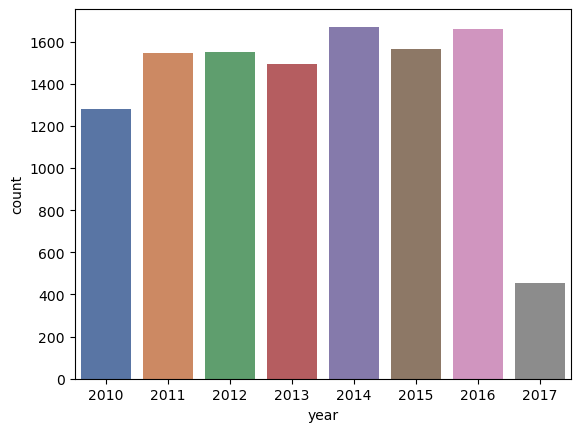

In [40]:
sns.countplot(data=sdf, x="year", hue="year", palette="deep", legend=False)

The chart shows the number of permits issued each year since 2010. (The year 2017 has significantly fewer permits because the dataset only covers part of 2017.) You can compare the number of permits visually by the size of each bar. Although some fluctuation occurs from year to year, most years had similar permit activity.

Similarly you can visualize it by month as well as day_of_week


<Axes: xlabel='month', ylabel='count'>

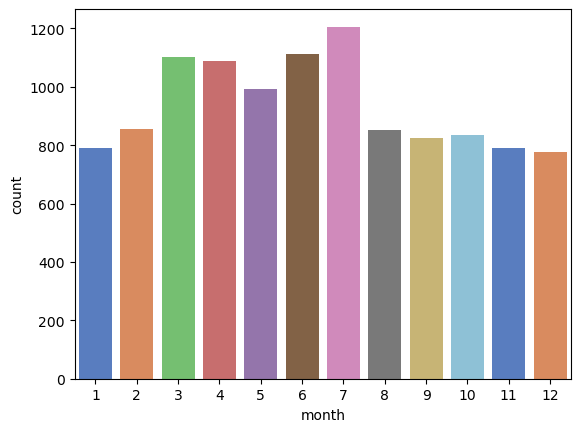

In [41]:
sns.countplot(data=sdf, x="month", hue="month", palette="muted", legend=False)

This bar chart changes to show the number of permits issued by month. Based on the chart, the highest permit activity occurs in June and July.


<Axes: xlabel='day_of_week', ylabel='count'>

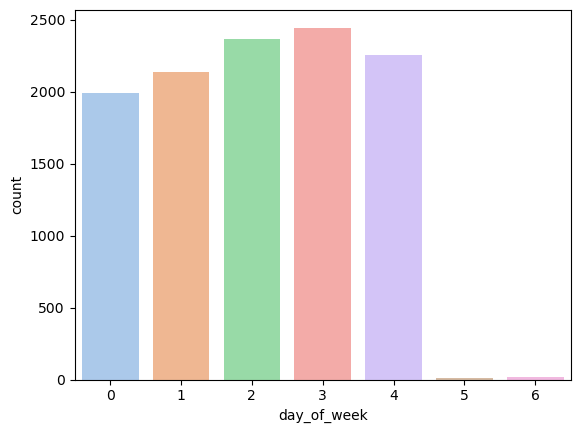

In [42]:
sns.countplot(data=sdf, x="day_of_week", hue="day_of_week",
              palette="pastel", legend=False)

Almost all permit activity occurs on weekdays. Government offices are closed on weekends, so few permits are issued then.


In [43]:
ddf = sdf.set_index("datetime")

<Axes: xlabel='datetime'>

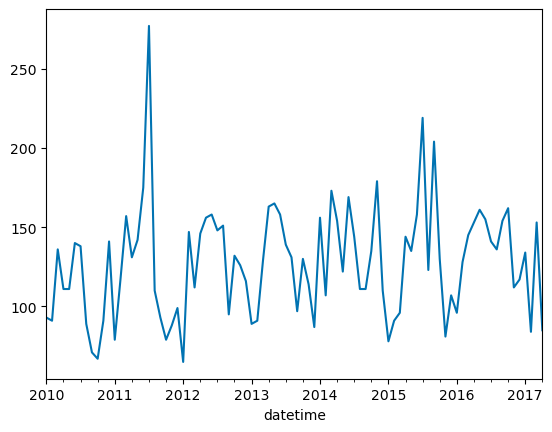

In [44]:
ddf["num"] = 1
ddf["num"].resample("M").sum().plot()

A huge spike in permit activity occurred in mid-2011. What caused this spike? Is it an increase in overall permit activity, or is it mostly an increase in a certain type of permit? You'll plot the number of permits based on Use_Code to find which one cased the spike.


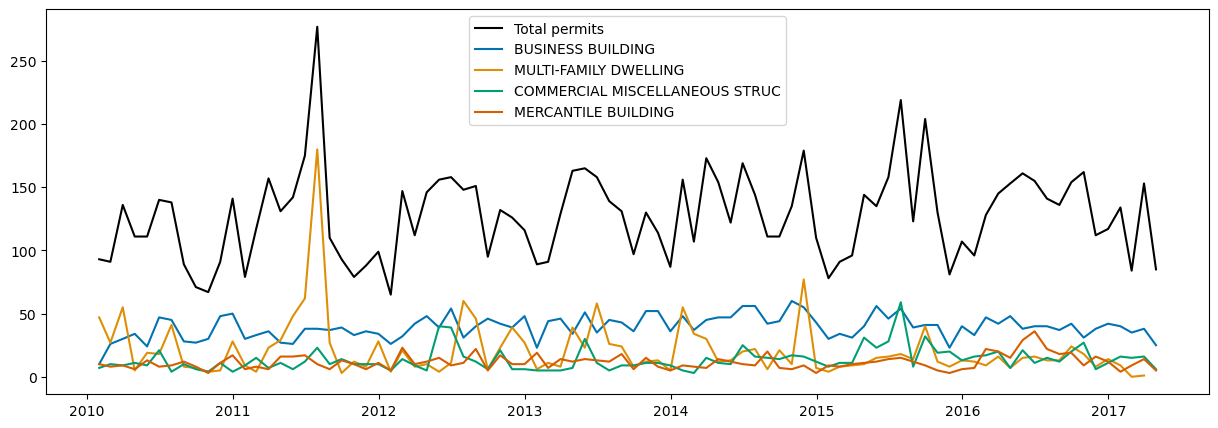

In [45]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(ddf["num"].resample("M").sum(), "k", label="Total permits")
for use_code in filtered_permits:
    x = ddf[ddf.use_code == use_code]["num"].resample("M").sum()
    ax.plot(x, label=use_code)
ax.legend()

Based on the legend, permit activity spiked in 2011 due to a sharp increase in the number of multifamily dwelling permits issued. This likely means that there was large residential growth in 2011.

You've investigated some temporal patterns in your data. Next, you'll look at spatial patterns. Are there certain areas in the county that have experienced a relatively high degree of permit activity? Was the 2011 spike in residential permits in a specific location? To find out, you'll change the symbology of the map card to show hot spots, or areas with concentrations of points.



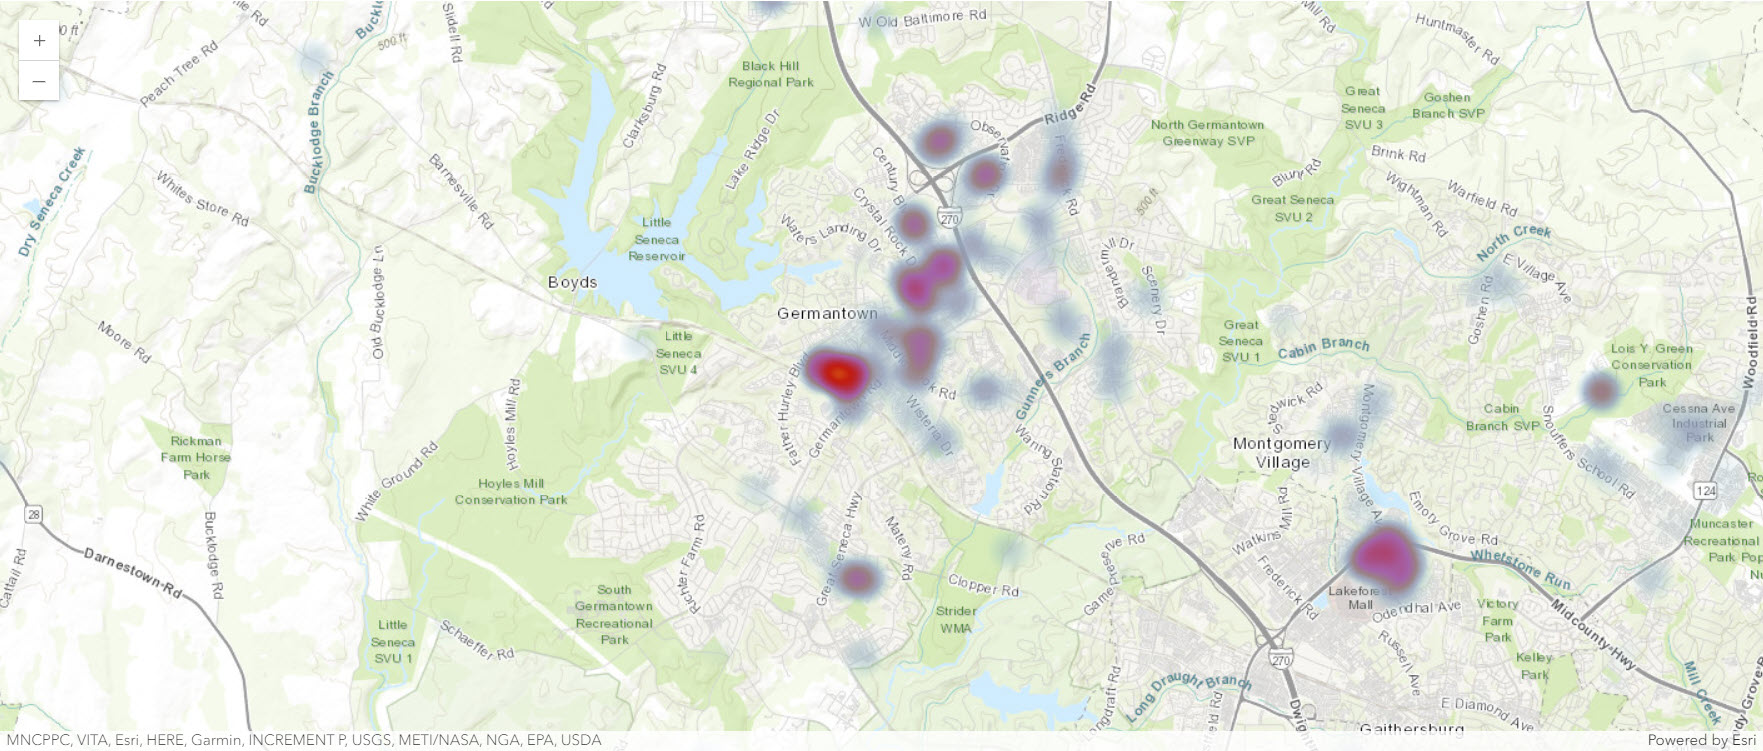

In [46]:
hotspot_map = agol_gis.map("Germantown, Montgomery County, Maryland")
hotspot_map

In [47]:
sdf.spatial.plot(hotspot_map)

True

In [48]:
sdf_sm = hotspot_map.content.renderer(0).smart_mapping()
sdf_sm.heatmap_renderer()

The hot spots show up where there is a high concentration of permits. The highest concentration areas are in the southeast and northwest corners of the county, which correspond to the major population centers of Germantown and the suburban communities near Washington, D.C.

Next, you'll see if the 2011 permit spike corresponds to a specific area of the map. The code below filters the dataframe to only show permits from 2011 and highlights related data in the map. In this case, the heat map changes to show the hot spot in the northwest part of the county, near Germantown.



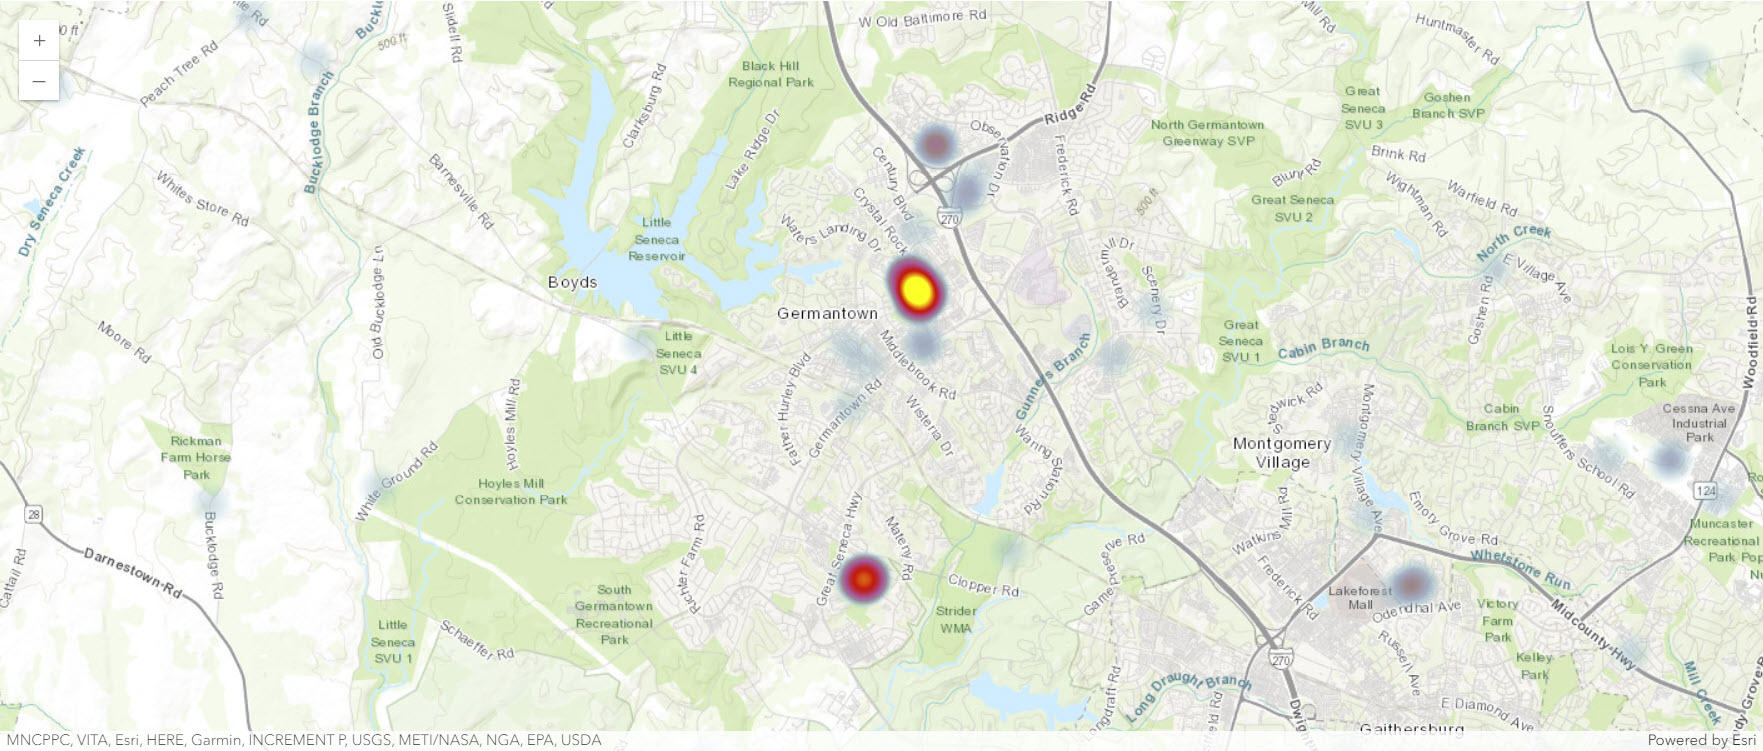

In [49]:
hotspot_2011_map = agol_gis.map("Germantown, Montgomery County, Maryland")
hotspot_2011_map

In [50]:
sdf.loc[sdf.year == 2011].copy().spatial.plot(map_widget=hotspot_2011_map)

True

In [51]:
sedf_2011_sm = hotspot_2011_map.content.renderer(0).smart_mapping()
sedf_2011_sm.heatmap_renderer()